# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)


# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [7]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras

In [8]:
# As it is a regression problem the output is a neuron.
output_var = 1
print(output_var, ' output variables')


dims = X_train.shape[1]
print(dims, 'input variables')


1  output variables
7 input variables


In [9]:
# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

In [10]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit( X_train,  Y_train, verbose=2,epochs=15)

Building model...
Model variables:  7
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 0s - loss: 0.9231
Epoch 2/15
 - 0s - loss: 0.6567
Epoch 3/15
 - 0s - loss: 0.4835
Epoch 4/15
 - 0s - loss: 0.3612
Epoch 5/15
 - 0s - loss: 0.2739
Epoch 6/15
 - 0s - loss: 0.2111
Epoch 7/15
 - 0s - loss: 0.1647
Epoch 8/15
 - 0s - loss: 0.1299
Epoch 9/15
 - 0s - loss: 0.1038
Epoch 10/15
 - 0s - loss: 0.0839
Epoch 11/15
 - 0s - loss: 0.0686
Epoch 12/15
 - 0s - loss: 0.0565
Epoch 13/15
 - 0s - loss: 0.0470
Epoch 14/15
 - 0s - loss: 0.0394
Epoch 15/15
 - 0s - loss: 0.0333


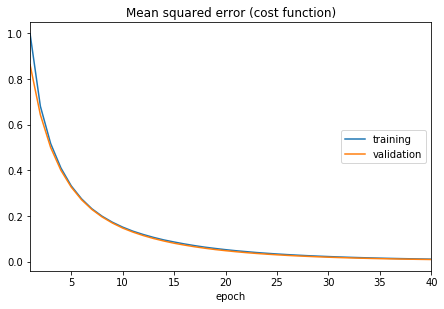

In [11]:
import keras.optimizers as opts

K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

op = opts.SGD(lr=learning_rate)

model.compile(loss = 'mean_squared_error',
              optimizer = op)

model.fit(X_train, Y_train,
          verbose=1, 
          epochs=40, 
          validation_data=[X_test,Y_test],
          callbacks=[PlotLossesKeras()])

In [12]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [13]:
K.clear_session()

Train on 350 samples, validate on 150 samples
Epoch 1/400
350/350 [==============================] - 0s 1ms/step - loss: 0.8148 - acc: 0.0000e+00 - val_loss: 0.7948 - val_acc: 0.0000e+00
Epoch 2/400
350/350 [==============================] - 0s 34us/step - loss: 0.8021 - acc: 0.0000e+00 - val_loss: 0.7813 - val_acc: 0.0000e+00
Epoch 3/400
350/350 [==============================] - 0s 46us/step - loss: 0.7899 - acc: 0.0000e+00 - val_loss: 0.7689 - val_acc: 0.0000e+00
Epoch 4/400
350/350 [==============================] - 0s 57us/step - loss: 0.7789 - acc: 0.0000e+00 - val_loss: 0.7577 - val_acc: 0.0000e+00
Epoch 5/400
350/350 [==============================] - 0s 54us/step - loss: 0.7688 - acc: 0.0000e+00 - val_loss: 0.7477 - val_acc: 0.0000e+00
Epoch 6/400
350/350 [==============================] - 0s 49us/step - loss: 0.7593 - acc: 0.0000e+00 - val_loss: 0.7389 - val_acc: 0.0000e+00
Epoch 7/400
350/350 [==============================] - 0s 52us/step - loss: 0.7514 - acc: 0.0000e+00 - 

350/350 [==============================] - 0s 46us/step - loss: 0.5982 - acc: 0.0000e+00 - val_loss: 0.5975 - val_acc: 0.0000e+00
Epoch 59/400
350/350 [==============================] - 0s 34us/step - loss: 0.5969 - acc: 0.0000e+00 - val_loss: 0.5964 - val_acc: 0.0000e+00
Epoch 60/400
350/350 [==============================] - 0s 46us/step - loss: 0.5955 - acc: 0.0000e+00 - val_loss: 0.5953 - val_acc: 0.0000e+00
Epoch 61/400
350/350 [==============================] - 0s 46us/step - loss: 0.5942 - acc: 0.0000e+00 - val_loss: 0.5942 - val_acc: 0.0000e+00
Epoch 62/400
350/350 [==============================] - 0s 46us/step - loss: 0.5929 - acc: 0.0000e+00 - val_loss: 0.5932 - val_acc: 0.0000e+00
Epoch 63/400
350/350 [==============================] - 0s 46us/step - loss: 0.5917 - acc: 0.0000e+00 - val_loss: 0.5922 - val_acc: 0.0000e+00
Epoch 64/400
350/350 [==============================] - 0s 46us/step - loss: 0.5905 - acc: 0.0000e+00 - val_loss: 0.5912 - val_acc: 0.0000e+00
Epoch 65/400

350/350 [==============================] - 0s 46us/step - loss: 0.5573 - acc: 0.0000e+00 - val_loss: 0.5642 - val_acc: 0.0000e+00
Epoch 116/400
350/350 [==============================] - 0s 46us/step - loss: 0.5570 - acc: 0.0000e+00 - val_loss: 0.5640 - val_acc: 0.0000e+00
Epoch 117/400
350/350 [==============================] - 0s 46us/step - loss: 0.5567 - acc: 0.0000e+00 - val_loss: 0.5637 - val_acc: 0.0000e+00
Epoch 118/400
350/350 [==============================] - 0s 46us/step - loss: 0.5565 - acc: 0.0000e+00 - val_loss: 0.5635 - val_acc: 0.0000e+00
Epoch 119/400
350/350 [==============================] - 0s 46us/step - loss: 0.5562 - acc: 0.0000e+00 - val_loss: 0.5633 - val_acc: 0.0000e+00
Epoch 120/400
350/350 [==============================] - 0s 46us/step - loss: 0.5559 - acc: 0.0000e+00 - val_loss: 0.5631 - val_acc: 0.0000e+00
Epoch 121/400
350/350 [==============================] - 0s 46us/step - loss: 0.5557 - acc: 0.0000e+00 - val_loss: 0.5629 - val_acc: 0.0000e+00
Epoch 

Epoch 172/400
350/350 [==============================] - 0s 46us/step - loss: 0.5486 - acc: 0.0000e+00 - val_loss: 0.5571 - val_acc: 0.0000e+00
Epoch 173/400
350/350 [==============================] - 0s 46us/step - loss: 0.5486 - acc: 0.0000e+00 - val_loss: 0.5571 - val_acc: 0.0000e+00
Epoch 174/400
350/350 [==============================] - 0s 46us/step - loss: 0.5485 - acc: 0.0000e+00 - val_loss: 0.5570 - val_acc: 0.0000e+00
Epoch 175/400
350/350 [==============================] - 0s 46us/step - loss: 0.5485 - acc: 0.0000e+00 - val_loss: 0.5570 - val_acc: 0.0000e+00
Epoch 176/400
350/350 [==============================] - 0s 46us/step - loss: 0.5484 - acc: 0.0000e+00 - val_loss: 0.5569 - val_acc: 0.0000e+00
Epoch 177/400
350/350 [==============================] - 0s 46us/step - loss: 0.5483 - acc: 0.0000e+00 - val_loss: 0.5569 - val_acc: 0.0000e+00
Epoch 178/400
350/350 [==============================] - 0s 46us/step - loss: 0.5483 - acc: 0.0000e+00 - val_loss: 0.5569 - val_acc: 0.0

Epoch 229/400
350/350 [==============================] - 0s 46us/step - loss: 0.5465 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0000e+00
Epoch 230/400
350/350 [==============================] - 0s 69us/step - loss: 0.5465 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0000e+00
Epoch 231/400
350/350 [==============================] - 0s 57us/step - loss: 0.5465 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0000e+00
Epoch 232/400
350/350 [==============================] - 0s 57us/step - loss: 0.5464 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0000e+00
Epoch 233/400
350/350 [==============================] - 0s 46us/step - loss: 0.5464 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0000e+00
Epoch 234/400
350/350 [==============================] - 0s 46us/step - loss: 0.5464 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0000e+00
Epoch 235/400
350/350 [==============================] - 0s 57us/step - loss: 0.5464 - acc: 0.0000e+00 - val_loss: 0.5557 - val_acc: 0.0

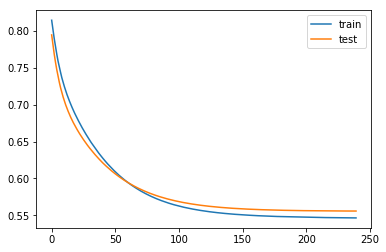

In [14]:

# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot



model = Sequential()
model.add(Dense(output_var, input_shape=(dims,) , activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

'''
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))
op = opts.SGD(lr=learning_rate)
model.compile(loss = 'mean_squared_error',optimizer = op)
'''

# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1)
# fit model
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=400, verbose=1, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test,Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

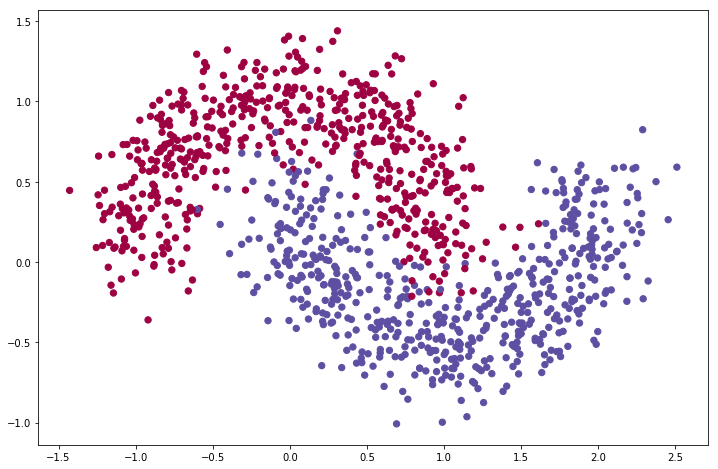

In [15]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train  = make_moons(n_samples=1100, noise= 0.2, random_state=3)

plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [16]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X1 = [X[0] for X in x_train]
X2 = [X[1] for X in x_train]

X_ = np.array([X1,X2])
Y_ = np.array([y_train])


# Scaling data
std_scale = preprocessing.StandardScaler().fit(X_)

X = pd.DataFrame({'X1':X1,'X2':X2})
Y = pd.DataFrame({'Y':y_train})

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=22)

In [17]:
# Parameters
learning_rate = 0.01
training_epochs = 150
display_step = 1

# As it is a regression problem the output is a neuron.


output_var = 1
print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

1  output variables
2 input variables


Train on 880 samples, validate on 220 samples
Epoch 1/400
880/880 [==============================] - 1s 928us/step - loss: 0.7039 - acc: 0.5034 - val_loss: 0.7017 - val_acc: 0.4545
Epoch 2/400
880/880 [==============================] - 0s 43us/step - loss: 0.6970 - acc: 0.3886 - val_loss: 0.6949 - val_acc: 0.5136
Epoch 3/400
880/880 [==============================] - 0s 44us/step - loss: 0.6935 - acc: 0.4966 - val_loss: 0.6914 - val_acc: 0.5136
Epoch 4/400
880/880 [==============================] - 0s 44us/step - loss: 0.6920 - acc: 0.4966 - val_loss: 0.6886 - val_acc: 0.5136
Epoch 5/400
880/880 [==============================] - 0s 45us/step - loss: 0.6902 - acc: 0.4966 - val_loss: 0.6870 - val_acc: 0.5136
Epoch 6/400
880/880 [==============================] - 0s 43us/step - loss: 0.6887 - acc: 0.4966 - val_loss: 0.6839 - val_acc: 0.5136
Epoch 7/400
880/880 [==============================] - 0s 44us/step - loss: 0.6864 - acc: 0.5386 - val_loss: 0.6816 - val_acc: 0.6000
Epoch 8/400
880

880/880 [==============================] - 0s 44us/step - loss: 0.3277 - acc: 0.8409 - val_loss: 0.2831 - val_acc: 0.8909
Epoch 62/400
880/880 [==============================] - 0s 40us/step - loss: 0.3254 - acc: 0.8443 - val_loss: 0.2809 - val_acc: 0.8909
Epoch 63/400
880/880 [==============================] - 0s 47us/step - loss: 0.3217 - acc: 0.8489 - val_loss: 0.2790 - val_acc: 0.8909
Epoch 64/400
880/880 [==============================] - 0s 49us/step - loss: 0.3198 - acc: 0.8511 - val_loss: 0.2772 - val_acc: 0.8909
Epoch 65/400
880/880 [==============================] - 0s 46us/step - loss: 0.3164 - acc: 0.8523 - val_loss: 0.2756 - val_acc: 0.8909
Epoch 66/400
880/880 [==============================] - 0s 46us/step - loss: 0.3143 - acc: 0.8580 - val_loss: 0.2740 - val_acc: 0.8955
Epoch 67/400
880/880 [==============================] - 0s 42us/step - loss: 0.3117 - acc: 0.8602 - val_loss: 0.2726 - val_acc: 0.8955
Epoch 68/400
880/880 [==============================] - 0s 40us/step

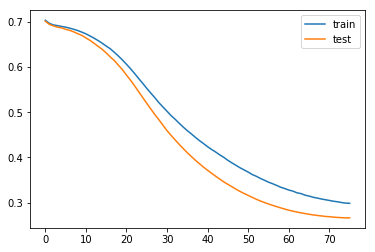

In [18]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot


model = Sequential()
model.add(Dense(output_var, input_shape=(dims,) , activation='sigmoid'))
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(output_var, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1)
# fit model
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs=400, verbose=1, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(X_train,Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
print("Building model...")

print('Model variables: ', dims)
K.clear_session()
model = Sequential()

model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(output_var, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X, Y, verbose=1,epochs=400)

Building model...
Model variables:  2
Epoch 1/400
1100/1100 [==============================] - 1s 540us/step - loss: 0.6636
Epoch 2/400
1100/1100 [==============================] - 0s 44us/step - loss: 0.5669
Epoch 3/400
1100/1100 [==============================] - 0s 41us/step - loss: 0.4952
Epoch 4/400
1100/1100 [==============================] - 0s 35us/step - loss: 0.4400
Epoch 5/400
1100/1100 [==============================] - 0s 41us/step - loss: 0.3980
Epoch 6/400
1100/1100 [==============================] - 0s 41us/step - loss: 0.3663
Epoch 7/400
1100/1100 [==============================] - 0s 39us/step - loss: 0.3422
Epoch 8/400
1100/1100 [==============================] - 0s 39us/step - loss: 0.3241
Epoch 9/400
1100/1100 [==============================] - 0s 39us/step - loss: 0.3102
Epoch 10/400
1100/1100 [==============================] - 0s 37us/step - loss: 0.3000
Epoch 11/400
1100/1100 [==============================] - 0s 37us/step - loss: 0.2918
Epoch 12/400
1100/1100 [

1100/1100 [==============================] - 0s 33us/step - loss: 0.1213
Epoch 96/400
1100/1100 [==============================] - 0s 36us/step - loss: 0.1201
Epoch 97/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1193
Epoch 98/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1178
Epoch 99/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1166
Epoch 100/400
1100/1100 [==============================] - ETA: 0s - loss: 0.095 - 0s 29us/step - loss: 0.1155
Epoch 101/400
1100/1100 [==============================] - 0s 29us/step - loss: 0.1144
Epoch 102/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1142
Epoch 103/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1133
Epoch 104/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1111
Epoch 105/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.1103
Epoch 106/400
1100/1100 [============

1100/1100 [==============================] - 0s 33us/step - loss: 0.0780
Epoch 189/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0776
Epoch 190/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0771
Epoch 191/400
1100/1100 [==============================] - 0s 29us/step - loss: 0.0770
Epoch 192/400
1100/1100 [==============================] - 0s 36us/step - loss: 0.0775
Epoch 193/400
1100/1100 [==============================] - 0s 32us/step - loss: 0.0768
Epoch 194/400
1100/1100 [==============================] - 0s 34us/step - loss: 0.0770
Epoch 195/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0770
Epoch 196/400
1100/1100 [==============================] - 0s 32us/step - loss: 0.0763
Epoch 197/400
1100/1100 [==============================] - 0s 34us/step - loss: 0.0763
Epoch 198/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0760
Epoch 199/400
1100/1100 [==============================] 

1100/1100 [==============================] - 0s 33us/step - loss: 0.0720
Epoch 283/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0708
Epoch 284/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0710
Epoch 285/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0711
Epoch 286/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0713
Epoch 287/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0709
Epoch 288/400
1100/1100 [==============================] - 0s 29us/step - loss: 0.0710
Epoch 289/400
1100/1100 [==============================] - 0s 29us/step - loss: 0.0717
Epoch 290/400
1100/1100 [==============================] - 0s 29us/step - loss: 0.0709
Epoch 291/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0705
Epoch 292/400
1100/1100 [==============================] - 0s 29us/step - loss: 0.0710
Epoch 293/400
1100/1100 [==============================] 

1100/1100 [==============================] - 0s 47us/step - loss: 0.0680
Epoch 377/400
1100/1100 [==============================] - 0s 38us/step - loss: 0.0683
Epoch 378/400
1100/1100 [==============================] - 0s 31us/step - loss: 0.0687
Epoch 379/400
1100/1100 [==============================] - 0s 30us/step - loss: 0.0684
Epoch 380/400
1100/1100 [==============================] - 0s 32us/step - loss: 0.0684
Epoch 381/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0688
Epoch 382/400
1100/1100 [==============================] - 0s 33us/step - loss: 0.0681
Epoch 383/400
1100/1100 [==============================] - 0s 32us/step - loss: 0.0688
Epoch 384/400
1100/1100 [==============================] - 0s 35us/step - loss: 0.0681
Epoch 385/400
1100/1100 [==============================] - 0s 38us/step - loss: 0.0682
Epoch 386/400
1100/1100 [==============================] - 0s 36us/step - loss: 0.0681
Epoch 387/400
1100/1100 [==============================] 

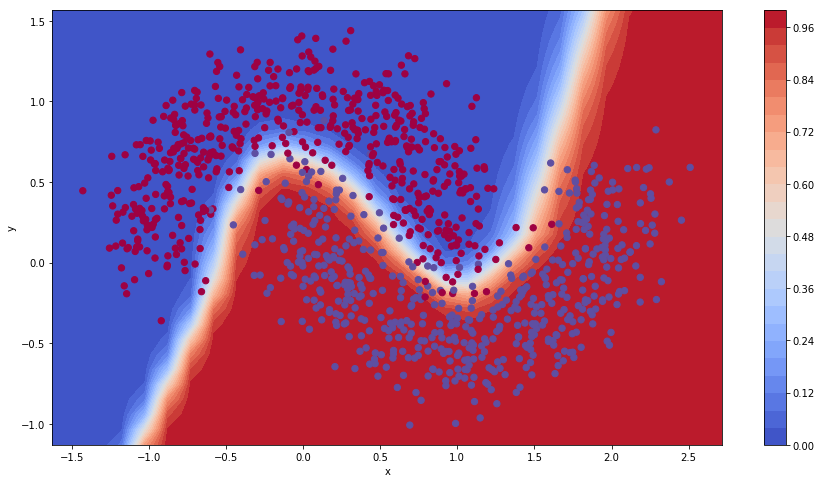

In [20]:
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize=(15, 8))   
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, np.array(X), pred_fun)
#plot_data(x_train, y_train)
plt.scatter(X.X1, X.X2, c=Y.Y, s=40, cmap=plt.cm.Spectral)